In this catch all project, we explore clustering using the iris dataset, touch on regularization, and then implement Naive Bayes with a voting datasets

In [224]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
% matplotlib inline
import statsmodels.formula.api as smf
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix

# Clustering

In [98]:
from sklearn import datasets
iris = datasets.load_iris()
irisDF = pd.DataFrame(iris.data)
irisDF.columns = iris.feature_names
irisDF['target'] = iris.target

In [99]:
irisDF.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


K-value: 2


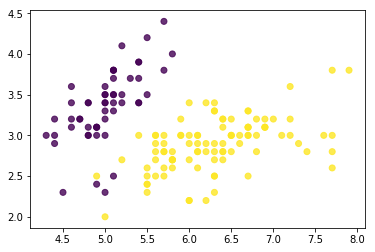

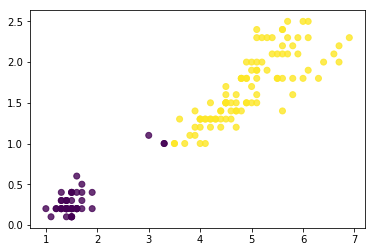

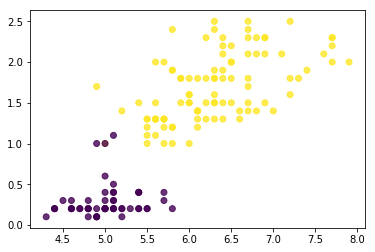

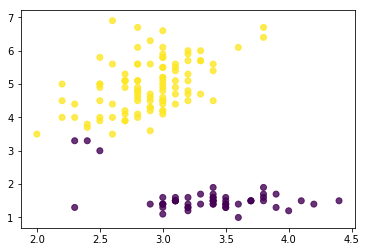

K-value: 3


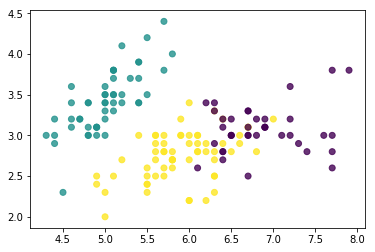

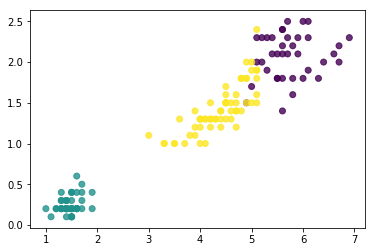

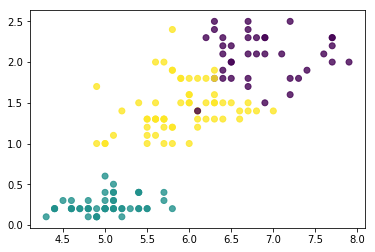

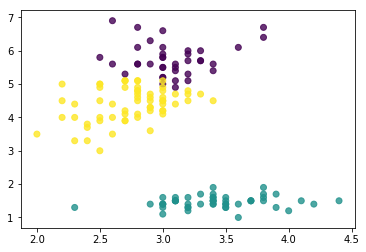

K-value: 4


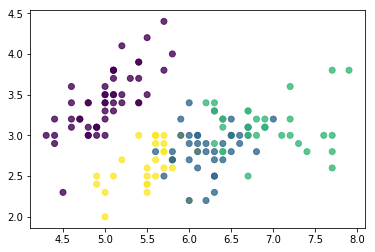

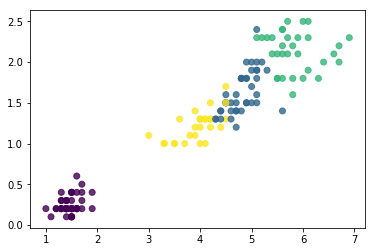

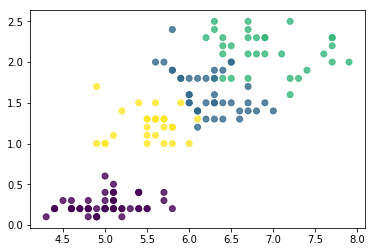

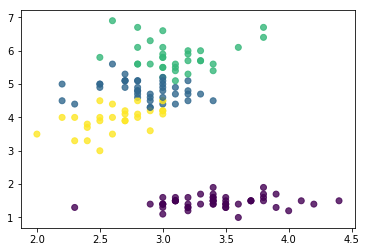

In [100]:
for i in range(2, 5):
    print("K-value:", i)
    km = KMeans(i)
    x = irisDF.drop(['target'], axis = 1)
    hatY = km.fit(x).labels_
    mu = km.cluster_centers_
    plt.scatter(x[x.columns[0]], x[x.columns[1]], c=hatY, alpha=0.8)
    plt.show()
    plt.scatter(x[x.columns[2]], x[x.columns[3]], c=hatY, alpha=0.8)
    plt.show()
    plt.scatter(x[x.columns[0]], x[x.columns[3]], c=hatY, alpha=0.8)
    plt.show()
    plt.scatter(x[x.columns[1]], x[x.columns[2]], c=hatY, alpha=0.8)
    plt.show()



3 seems to be the best cluster

In [216]:
km = KMeans(3)
x = irisDF.drop(['target'], axis = 1)
Y = irisDF['target']
km.fit(x)
predictions = km.predict(x)
crossTable = pd.crosstab(predictions, Y, rownames=['cluster'])
crossTable.columns = ['Setosa','Versicolour','Virginica']
crossTable

,Setosa,Versicolour,Virginica
cluster,,,
0,50,0,0
1,0,2,36
2,0,48,14


The clusters did come close, but they were not perfect

# Regularization

In [226]:
from sklearn.datasets import load_boston
from sklearn import linear_model
from sklearn import metrics

bdata = load_boston()
data = pd.DataFrame(bdata.data)
data.columns = bdata.feature_names;

regularizationValues = [1e-10,1e-8,1e-6,1e-4,1e-2,1, 1e2, 1e4, 1e6, 1e8, 1e10]
MSEs = np.empty(len(regularizationValues)) 
for i in range(len(regularizationValues)):
    X = data
    y = bdata.target
    reg = linear_model.Ridge(alpha = regularizationValues[i])
    reg.fit(X, y)
    predictions = cross_val_predict(reg, X, y, cv=10)
    MSEs[i] = metrics.mean_squared_error(y, predictions)
results = pd.DataFrame();
results['lambda'] = regularizationValues
results['MSE'] = MSEs
results

,lambda,MSE
0,1.000000e-10,34.597043
1,1.000000e-08,34.597043
2,1.000000e-06,34.597041
3,1.000000e-04,34.596883
4,1.000000e-02,34.581318
5,1.000000e+00,33.963001
6,1.000000e+02,29.550015
7,1.000000e+04,43.528887
8,1.000000e+06,67.484690
9,1.000000e+08,87.492603


The best lambda value seems to be 1.000000e+02

# Naive Bayes

In [211]:
df = pd.read_csv('house-votes-84.csv.bz2', header=None)
y = pd.get_dummies(df[0])['democrat']

probabilities = pd.DataFrame(index = df.columns[1:])

d = df.groupby(0).count()[1][0] /  (df.groupby(0).count()[1][0] + df.groupby(0).count()[1][1])
r = df.groupby(0).count()[1][1] /  (df.groupby(0).count()[1][0] + df.groupby(0).count()[1][1])
                                    
ry = np.empty(17)
rn = np.empty(17)
dy = np.empty(17)
dn = np.empty(17)

for i in range(1, 17):
    dfR = df[df[0] == 'republican']
    dfD= df[df[0] == 'democrat']
    dy[i] = (dfD[i] == 'y').sum() / len(dfD)
    ry[i] = (dfR[i] == 'y').sum() / len(dfR)
    dn[i] = (dfD[i] == 'n').sum() / len(dfD)
    rn[i] = (dfR[i] == 'n').sum() / len(dfR)
    
probabilities['ry'] = ry[1:]
probabilities['rn'] = rn[1:]
probabilities['dn'] = dn[1:]
probabilities['dy'] = dy[1:]

predictionsResult = np.empty(len(df)) 

for i in range(len(df)):
    row = df.iloc[i]
    predictionD = d
    predictionR = r
    for j in range(16):
        if row[j] == 'y':
            predictionD = predictionD * probabilities.iloc[j-1]['dy'] 
            predictionR = predictionR * probabilities.iloc[j-1]['ry'] 
        elif row[j] == 'n':
            predictionD = predictionD * probabilities.iloc[j-1]['dn'] 
            predictionR = predictionR * probabilities.iloc[j-1]['rn'] 
    if(predictionD > predictionR):
        predictionsResult[i] = 1
    else:
        predictionsResult[i] = 0

tn, fp, fn, tp = confusion_matrix(y, predictionsResult).ravel()

print("Accuracy:", (tp+tn) / (tp+fp+fn+tn))
print("Precision:", tp/(tp + fp))
print("Recall:", tp/(tp+fn))    

Accuracy: 0.903448275862
Precision: 0.948207171315
Recall: 0.89138576779


Seems like a pretty good prediction!